# MACHINE LEARNING 30412 – Project 2024 #

Student Names and ids

## 1. INTRODUCTION

Banks use credit scoring algorithms to estimate the probability of default when deciding whether a 
loan should be granted.   
In the project, we will build a credit scoring algorithm predicting the probability that 
somebody will experience financial distress in the next two years. The goal of this project is to build 
a model that loan providers can use to help borrowers make the best financial decisions. 

The following notebook will explore the given dataset. The main concerns of this notebook will be as follows:
* Check the data for structural and non-structural missingness, removing observations with missing values
    * This includes also dropping variables with large percentage of missingness
* Check the validity of entries (range is within resonable boundaries inferred from domain knowledge and common sense)
* Remove redundancy
* Apply several Unsupervised techniques to find out patterns
* Performing well-known Machine learning models and training neural networks to predict target class.

## 2. DATA PREPROCESSING AND EXLPORATORY DATA ANALYSIS (EDA) ####

#### Import libraries

We start by importing important libraries

In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #visualisation
import seaborn as sns   #visualisation
from tqdm import tqdm
%matplotlib inline     
sns.set(color_codes=True)


from random import randint
from scipy.stats import kurtosis, skew
import random

random.seed(111)
np.random.seed(111)

########## Unsupervised learning libraries ########## 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
############################################################


########## Supervised learning libraries ########## 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
############################################################

C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### Load the dataset

In [2]:
df = pd.read_csv("train.csv", engine = 'python', index_col=0)
df.shape

(112500, 11)

In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.034949,59.0,0.0,0.004933,7959.688894,5.0,0.0,0.0,0.0,0.0
1,0.0,0.155308,47.0,0.0,881.000000,NaN,6.0,0.0,1.0,0.0,0.0
2,0.0,0.165166,62.0,1.0,0.020327,2851.722407,8.0,0.0,0.0,0.0,0.0
3,0.0,0.010886,61.0,0.0,0.642979,1115.657341,6.0,0.0,1.0,0.0,0.0
4,0.0,0.000717,49.0,0.0,3603.000000,NaN,15.0,0.0,3.0,0.0,0.0


In [4]:
df.dtypes

SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
dtype: object

In [5]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,9.031300e+04,112500.000000,112500.000000,112500.000000,112500.000000,109555.000000
mean,0.066844,6.264202,52.468098,0.421351,353.833079,6.328072e+03,8.462951,0.266764,1.018231,0.240676,0.757665
std,0.249754,259.629816,14.799413,4.196450,2153.220951,1.413414e+04,5.150260,4.173038,1.133211,4.158755,1.114824
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029678,41.000000,0.000000,0.175078,3.227141e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153517,52.000000,0.000000,0.366299,5.112462e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558305,63.000000,0.000000,0.857619,7.812482e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
df[df["MonthlyIncome"]<100]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
63,0.0,0.068091,71.0,0.0,62.138614,94.038761,17.0,0.0,2.0,0.0,0.0
216,0.0,0.769231,46.0,1.0,51.000000,0.000000,5.0,1.0,0.0,0.0,0.0
277,0.0,0.000000,64.0,0.0,1834.000000,0.000000,9.0,0.0,3.0,0.0,0.0
413,0.0,0.127021,39.0,0.0,164.000000,0.000000,12.0,0.0,0.0,0.0,0.0
446,0.0,0.036884,56.0,0.0,900.000000,0.000000,5.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
112212,0.0,0.413105,70.0,1.0,11902.000000,0.000000,23.0,0.0,3.0,0.0,0.0
112258,0.0,0.142844,46.0,0.0,968.000000,0.000000,8.0,0.0,2.0,0.0,0.0
112287,0.0,0.000000,68.0,0.0,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0
112374,0.0,0.814461,62.0,0.0,2215.000000,0.000000,9.0,0.0,0.0,0.0,2.0


In [7]:
df[df["age"]<18]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
5005,0.0,1.0,-1.0,1.0,0.436927,5620.915291,6.0,0.0,2.0,0.0,2.0


In [8]:
df = df[df["age"]>=18]
df = df[(df["MonthlyIncome"]>100) | ((df["MonthlyIncome"].isna()))]

We remove these data entries since people younger than 18 are not likely to have credit debt moreover average and %25 percentile for monthly income is far more than 100 euros which make people who earn less than 100 euros outlier for our case so to avoid discrepancies in the model we can remove them. Those points are only make up %1 of the entire dataset so that it would not create a problem.

In [9]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,110765.000000,110765.000000,110765.000000,110765.000000,110765.000000,8.857800e+04,110765.000000,110765.000000,110765.000000,110765.000000,107820.000000
mean,0.067323,6.288962,52.540929,0.418336,338.729945,6.451929e+03,8.482923,0.262989,1.022679,0.236753,0.757633
std,0.250581,261.029145,14.762907,4.146426,2146.284639,1.424388e+04,5.151084,4.122332,1.136193,4.107815,1.113248
min,0.000000,0.000000,20.000000,0.000000,0.000000,1.012157e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029821,42.000000,0.000000,0.172707,3.327959e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154072,52.000000,0.000000,0.360440,5.188274e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558978,63.000000,0.000000,0.791842,7.884038e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Just by giving a quick look at the statistics of columns, we see that many of them are highly rigt skewed as their mean is too higher than %50 and %75 percentiles. They are not normalized, they do not have unit variance and 0 mean, their std deviation is higly large compared to the mean. 

Let's visualize their not-normal distributions:

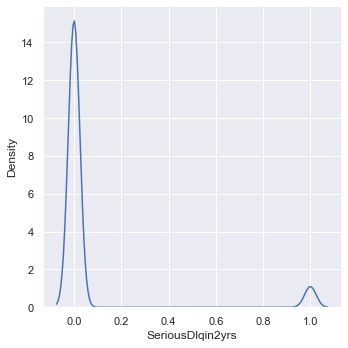

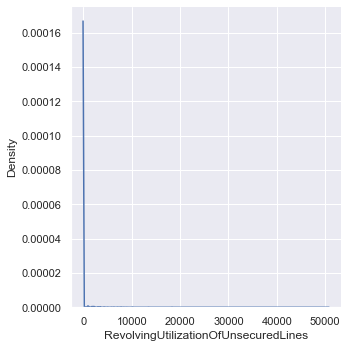

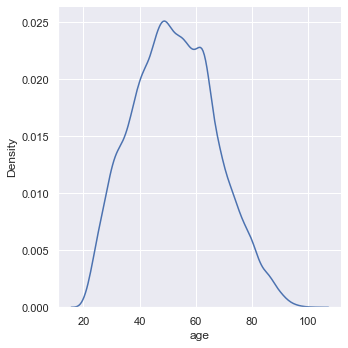

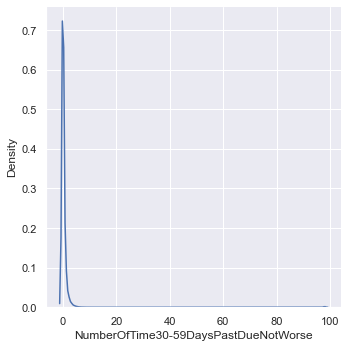

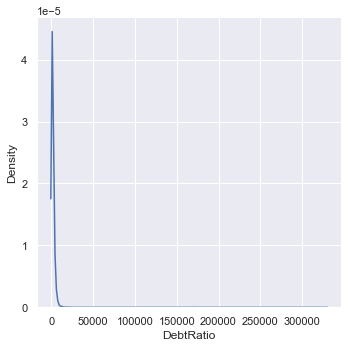

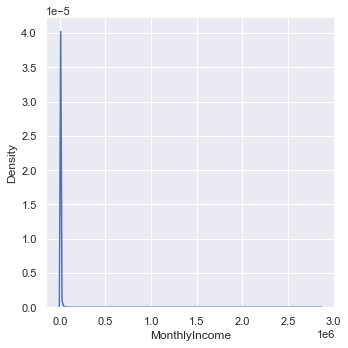

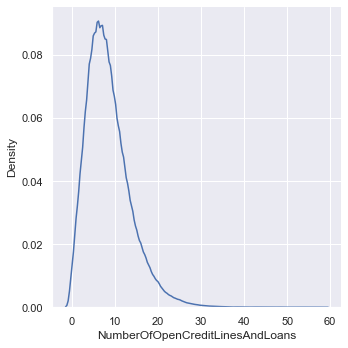

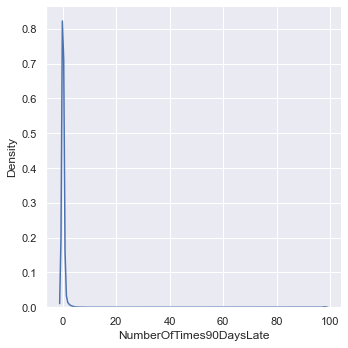

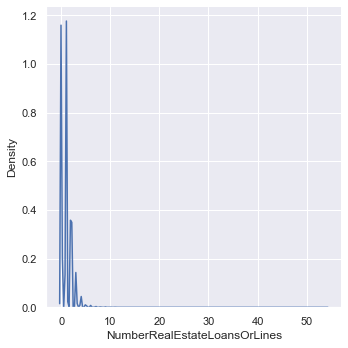

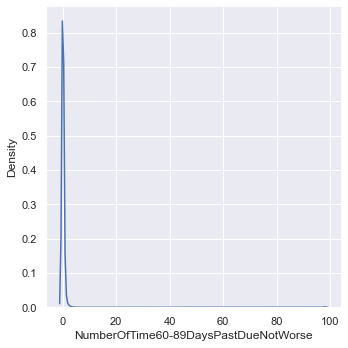

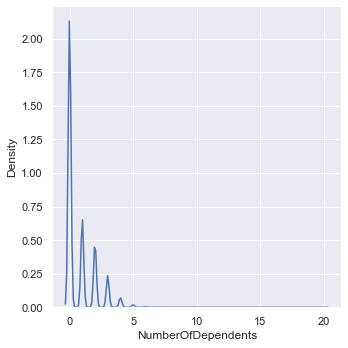

In [10]:
for i in range(len(df.columns)):
    sns.displot(
        df,
        x= df.columns.tolist()[i], 
        kind="kde"
    )

We drop duplicate rows

In [11]:
df = df.drop_duplicates()

#### Log-scaling on features

To handle right skeweness for our features, we will apply log transformation to them except age which we will use standart scaling.

In [12]:
# skewed_features = ['RevolvingUtilizationOfUnsecuredLines',
#                     'NumberOfTime30-59DaysPastDueNotWorse',
#                     'DebtRatio',
#                     'NumberOfOpenCreditLinesAndLoans',
#                     'NumberOfTimes90DaysLate',
#                     'NumberRealEstateLoansOrLines',
#                     'NumberOfTime60-89DaysPastDueNotWorse',
#                     'NumberOfDependents']

skewed_features = ["DebtRatio","RevolvingUtilizationOfUnsecuredLines"]

for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

df['MonthlyIncome'] = np.log(df['MonthlyIncome'])

# scaler = StandardScaler()
# df['age'] = scaler.fit_transform(df[['age']])


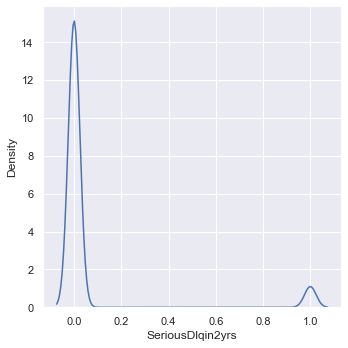

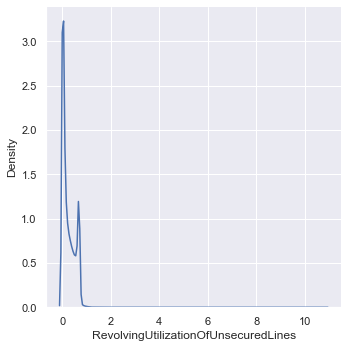

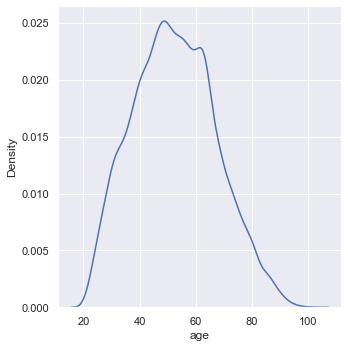

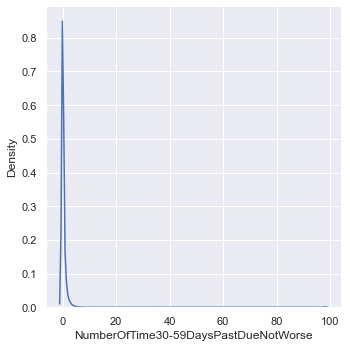

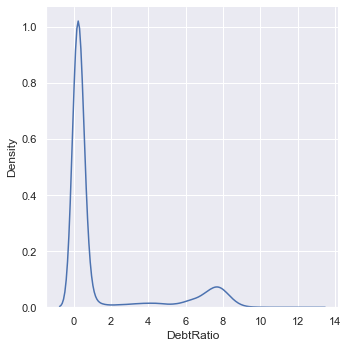

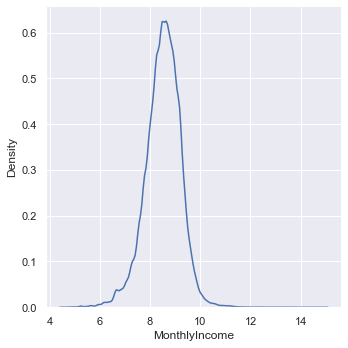

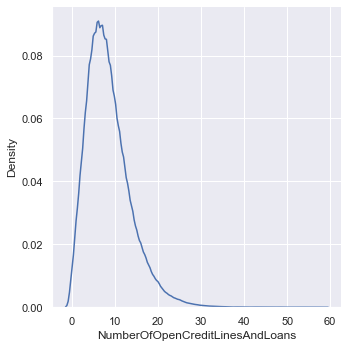

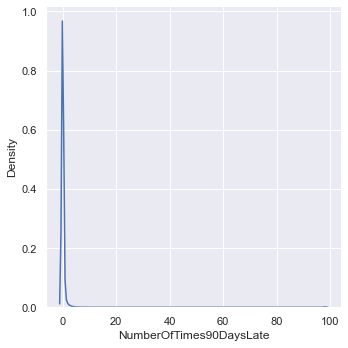

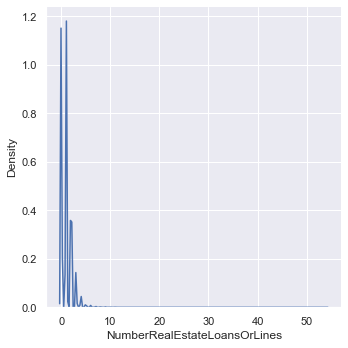

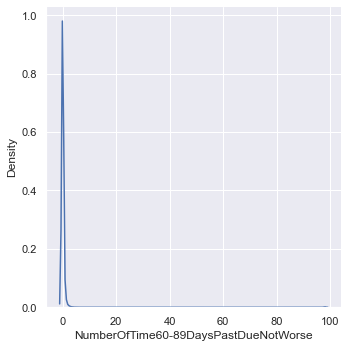

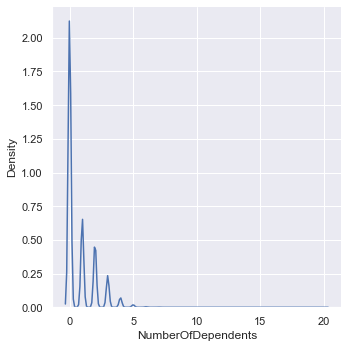

In [13]:
for i in range(len(df.columns)):
    sns.displot(
        df,
        x= df.columns.tolist()[i], 
        kind="kde"
    )

In [14]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,110424.000000,110424.000000,110424.000000,110424.000000,110424.000000,88578.000000,110424.000000,110424.000000,110424.000000,110424.000000,107552.000000
mean,0.067467,0.257666,52.536903,0.393003,1.457190,8.517623,8.504247,0.237095,1.025837,0.210860,0.759512
std,0.250831,0.385288,14.731299,3.828550,2.574835,0.698020,5.143928,3.801300,1.136521,3.785337,1.113993
min,0.000000,0.000000,20.000000,0.000000,0.000000,4.617253,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029557,42.000000,0.000000,0.160962,8.110114,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.143336,52.000000,0.000000,0.308834,8.554156,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.442888,63.000000,0.000000,0.585117,8.972595,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,10.833859,103.000000,98.000000,12.705832,14.868430,58.000000,98.000000,54.000000,98.000000,20.000000


#### Outlier Detection

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.413331
age                                     21.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.424155
MonthlyIncome                            0.862481
NumberOfOpenCreditLinesAndLoans          6.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             2.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       1.000000
dtype: float64


In [ ]:
df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

For now, we skip to remove them since they might be quite informative

In [17]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,110424.000000,110424.000000,110424.000000,110424.000000,110424.000000,88578.000000,110424.000000,110424.000000,110424.000000,110424.000000,107552.000000
mean,0.067467,0.257666,52.536903,0.393003,1.457190,8.517623,8.504247,0.237095,1.025837,0.210860,0.759512
std,0.250831,0.385288,14.731299,3.828550,2.574835,0.698020,5.143928,3.801300,1.136521,3.785337,1.113993
min,0.000000,0.000000,20.000000,0.000000,0.000000,4.617253,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029557,42.000000,0.000000,0.160962,8.110114,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.143336,52.000000,0.000000,0.308834,8.554156,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.442888,63.000000,0.000000,0.585117,8.972595,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,10.833859,103.000000,98.000000,12.705832,14.868430,58.000000,98.000000,54.000000,98.000000,20.000000


In [18]:
df[df.isnull().any(axis=1)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.0,0.144367,47.0,0.0,6.782192,NaN,6.0,0.0,1.0,0.0,0.0
4,0.0,0.000716,49.0,0.0,8.189800,NaN,15.0,0.0,3.0,0.0,0.0
5,0.0,0.001702,66.0,0.0,3.988984,NaN,3.0,0.0,0.0,0.0,0.0
11,0.0,0.091841,57.0,0.0,6.222576,NaN,11.0,0.0,1.0,0.0,0.0
14,0.0,0.650163,59.0,0.0,7.347944,NaN,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
112465,0.0,0.154246,78.0,0.0,7.181592,NaN,5.0,1.0,1.0,1.0,0.0
112475,0.0,0.030740,61.0,0.0,8.899185,NaN,8.0,0.0,2.0,0.0,0.0
112479,0.0,0.015893,72.0,0.0,3.178054,NaN,2.0,0.0,0.0,0.0,1.0
112483,0.0,0.293015,40.0,0.0,7.353722,NaN,11.0,0.0,0.0,0.0,0.0


#### Sparsity evaluation

In [19]:
def variable_sparsity(variable_series, threshold):
    if len(variable_series[variable_series == 0])/len(variable_series)>=threshold:
        return 1 # it is sparse
    else: 
        return 0 # it is not sparse

In [20]:
df_info_sparsity_th95 = (
    pd.DataFrame(df.apply(lambda x: variable_sparsity(x, 0.95), axis=0))
    .reset_index()
    .rename(columns={'index':'cell', 0:'flag_sparsity'})
)

df_info_sparsity_th50 = (
    pd.DataFrame(df.apply(lambda x: variable_sparsity(x, 0.50), axis=0))
    .reset_index()
    .rename(columns={'index':'cell', 0:'flag_sparsity'})
)

In [21]:
print(len(df_info_sparsity_th95[df_info_sparsity_th95.flag_sparsity ==1]))
print(len(df_info_sparsity_th50[df_info_sparsity_th50.flag_sparsity ==1]))

0
5


In [22]:
df_info_sparsity_th95 = df.apply(lambda x: variable_sparsity(x, 0.95), axis=0)
df_info_sparsity_th50 = df.apply(lambda x: variable_sparsity(x, 0.50), axis=0)

# Find columns that are sparse for the 95% threshold
sparse_columns_th95 = df_info_sparsity_th95[df_info_sparsity_th95 == 1].index.tolist()
print("Columns with >=95% zeros:")
print(sparse_columns_th95)

# Find columns that are sparse for the 50% threshold
sparse_columns_th50 = df_info_sparsity_th50[df_info_sparsity_th50 == 1].index.tolist()
print("Columns with >=50% zeros:")
print(sparse_columns_th50)

Columns with >=95% zeros:
[]
Columns with >=50% zeros:
['SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


We have a huge sparsity in the columns above so that we have to take into account sparsity on selecting ideal models for our case.

In [23]:
df_info_sparsity_th75_feature = (
    pd.DataFrame(df.T.apply(lambda x: variable_sparsity(x, 0.75), axis=0))
    .reset_index()
    .rename(columns={'index':'variable', 0:'flag_sparsity'})
)

df_info_sparsity_th50_feature = (
    pd.DataFrame(df.T.apply(lambda x: variable_sparsity(x, 0.50), axis=0))
    .reset_index()
    .rename(columns={'index':'variable', 0:'flag_sparsity'})
)

In [24]:
print(len(df_info_sparsity_th75_feature[df_info_sparsity_th75_feature.flag_sparsity ==1])/len(df))
print(len(df_info_sparsity_th50_feature[df_info_sparsity_th50_feature.flag_sparsity ==1])/len(df))

0.0
0.2303756429761646


We see that %23 of the data are not represented by half of the features.

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

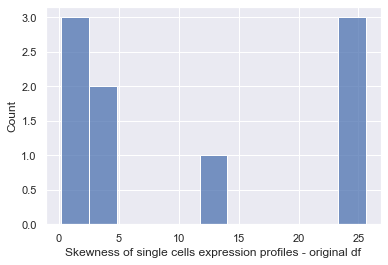

In [25]:
colN = df.shape[1]
colN
list_skew_cells = []
for i in range(colN) :     
     v_df = df[df.columns.tolist()[i]]
     list_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
list_skew_cells
sns.histplot(list_skew_cells,bins=len(list_skew_cells))
plt.xlabel('Skewness of single cells expression profiles - original df')

#### Assessing missingness

**Non-structural missingness**

Non-structural missingness refers to situations where missing data lacks a systematic pattern. This missingness falls into two categories:

- **Missing Completely at Random (MCAR):** The missing data is entirely random and has no relationship with other variables. Let $M_i^X$ = $1$(variable $X$ is missing for datapoint $i$). Let $W$ be a random matrix collecting all the pertinent study variables, observed or unobserved. Then $P(M_i^X = 1) = P(M_i^X = 1 | W = w)$. MCAR, in most cases, is an unrealistically strong presumption. In such cases, omission of missing data doesn't introduce structural bias in the data.
- **Missing at Random (MAR):** The pattern of missing data is related to observed variables in the dataset, but not to the specific missing value itself. Mathematically, $P(M_i^X = 1) = P(M_i^X = 1 | X_i=x_i)$ where probability is conditioned on the true, possibly unobserved, value of $X_i$.



In [26]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           21846
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2872
dtype: int64

In [27]:
np.mean(df[df.isnull().any(axis=1)]["DebtRatio"]) , np.mean(df[df.isnull().any(axis=1)==False]["DebtRatio"])

(6.20815824855947, 0.2854582051960044)

This clearly shows that missing values are not MCAR(Missing completely at Random), we can deduce that people who did not share their monthly income have likely more debt. Therefore deleting them would lead a potential bias within the model. Hence, we will try imputation methods for missing values.

In [28]:
from sklearn.linear_model import LinearRegression
nan_val = df[df["MonthlyIncome"].isna()]["MonthlyIncome"].values[1]
missing_dependents_indices = df[df['NumberOfDependents'].isna()].index

median_dependents = df['NumberOfDependents'].median()
df['NumberOfDependents'].fillna(median_dependents, inplace=True)

features_for_income = ['age', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents']

non_missing_income = df[df['MonthlyIncome'].notna()]

model_income = LinearRegression()
model_income.fit(non_missing_income[features_for_income], non_missing_income['MonthlyIncome'])

df.loc[df['MonthlyIncome'].isna(), 'MonthlyIncome'] = model_income.predict(df[df['MonthlyIncome'].isna()][features_for_income])

df.loc[missing_dependents_indices, 'NumberOfDependents'] = nan_val
features_for_dependents = ['age', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome']

non_missing_dependents = df[df['NumberOfDependents'].notna()]

model_dependents = LinearRegression()
model_dependents.fit(non_missing_dependents[features_for_dependents], non_missing_dependents['NumberOfDependents'])

df.loc[df['NumberOfDependents'].isna(), 'NumberOfDependents'] = np.round(model_dependents.predict(df[df['NumberOfDependents'].isna()][features_for_dependents]))


In [29]:
# from sklearn.impute import KNNImputer

# k = round(np.sqrt(df.shape[0]))

# if k % 2 == 0: k=k+1

# imputer = KNNImputer(n_neighbors=k)

# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# df['MonthlyIncome'] = df_imputed['MonthlyIncome']
# df['NumberOfDependents'] = df_imputed['NumberOfDependents']

# df.head()

In [30]:
df.reset_index(inplace=True,drop=True)
print(df.shape)
df.head()

(110424, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.034352,59.0,0.0,0.004921,8.982145,5.0,0.0,0.0,0.0,0.0
1,0.0,0.144367,47.0,0.0,6.782192,4.183378,6.0,0.0,1.0,0.0,0.0
2,0.0,0.152863,62.0,1.0,0.020123,7.955678,8.0,0.0,0.0,0.0,0.0
3,0.0,0.010828,61.0,0.0,0.496511,7.017199,6.0,0.0,1.0,0.0,0.0
4,0.0,0.000716,49.0,0.0,8.189800,3.299993,15.0,0.0,3.0,0.0,0.0


In [31]:
int_columns = ["SeriousDlqin2yrs",
               "age",
               "NumberOfTime30-59DaysPastDueNotWorse",
               "NumberOfOpenCreditLinesAndLoans",
               "NumberOfTimes90DaysLate",
               "NumberRealEstateLoansOrLines",
               "NumberOfTime60-89DaysPastDueNotWorse",
               "NumberOfDependents"]

df[int_columns] = df[int_columns].astype(int)

In [32]:
df[df["SeriousDlqin2yrs"]==1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,7450.0,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000
mean,1.0,0.516991,46.331678,2.276376,1.294426,7.744925,7.856107,1.987919,0.986980,1.721879,0.936644
std,0.0,0.373222,12.957687,11.300957,2.355995,1.625475,5.614354,11.326759,1.372971,11.313897,1.206668
min,1.0,0.000000,20.000000,0.000000,0.000000,1.684358,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.337192,36.000000,0.000000,0.178350,7.587939,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.605941,46.000000,0.000000,0.353605,8.241854,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,0.693147,55.000000,2.000000,0.614465,8.690707,11.000000,1.000000,2.000000,1.000000,2.000000
max,1.0,9.027499,102.000000,98.000000,10.399524,12.372941,57.000000,98.000000,25.000000,98.000000,8.000000


In [33]:
# from sklearn.preprocessing import Normalizer,StandardScaler

# transformer = StandardScaler().fit(df)
# df_scaled = pd.DataFrame(
#     transformer.transform(df), 
#     columns=df.columns
# )
# df_scaled.head()

Number of columns included:  (11, 11)
Average correlation between columns:  0.03071156436124911
Min. correlation between columns :  -0.9385768712775018


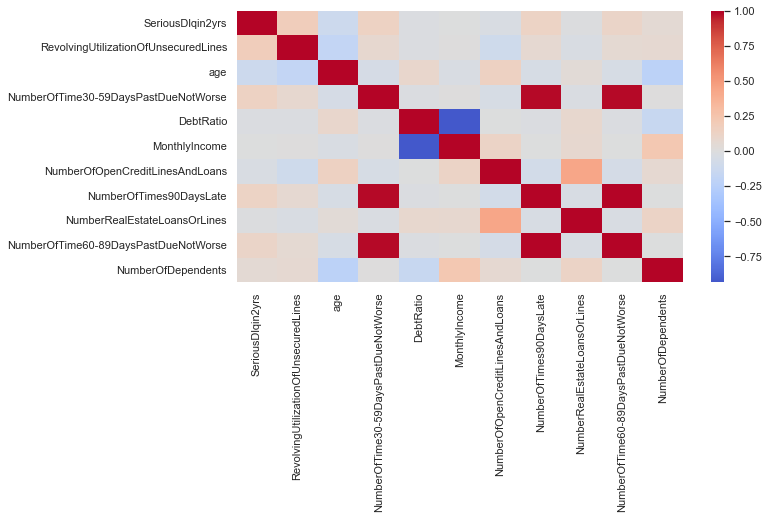

In [34]:
plt.figure(figsize=(10,5))
#df_small = df.iloc[:, :50]
#c= df_small.corr()
c= df.corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
sns.heatmap(c,cmap='coolwarm', center=0 )
print("Number of columns included: ", np.shape(c))
print("Average correlation between columns: ", midpoint)
print("Min. correlation between columns : ", c.values.min())

## UNSUPERVISED LEARNING

In [35]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [36]:
standardizer = StandardScaler()
unsupervised_columns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
df_scaled = standardizer.fit_transform(df[unsupervised_columns])
df_scaled = pd.DataFrame(df_scaled, columns=unsupervised_columns)
#df_scaled['label'] = df['SeriousDlqin2yrs']

### PCA

In [37]:
pca_df = PCA(random_state=101)
df_scaled_PCA = pca_df.fit_transform(df_scaled)
explained_variance_mcf7 = pca_df.explained_variance_ratio_
cumulative_sum_variance = np.cumsum(explained_variance_mcf7)

Text(0, 0.5, 'cumulative variance')

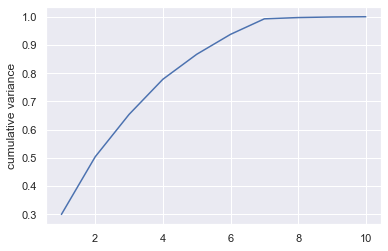

In [38]:
plt.plot(np.arange(1,11,1), cumulative_sum_variance[0:10])
plt.ylabel('cumulative variance')

Wee see that 7 columns are enough to represent all the information within the entire dataset. Only 2 principal component only reflects %50 of the information.

For this exercise, we can plot the two principal components:

In [39]:
df_scaled_PCA.shape, df.shape

((110424, 10), (110424, 11))

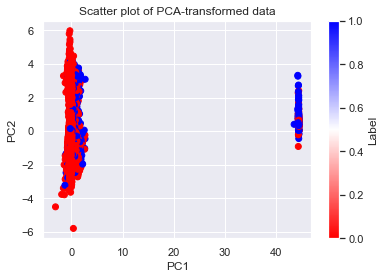

In [40]:
label = df['SeriousDlqin2yrs']
plt.figure()
scatter = plt.scatter(df_scaled_PCA[:, 0], df_scaled_PCA[:, 1], c=label, cmap="bwr_r")
plt.colorbar(scatter, label="Label")  # Adds a colorbar for context
plt.title("Scatter plot of PCA-transformed data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### TSNE

In [41]:
# tsne_df = TSNE(random_state=101)
# df_tsne = tsne_df.fit_transform(df_scaled)

In [42]:
# plt.figure()
# plot = plt.scatter(df_tsne[:,0], df_tsne[:,1], c=label, cmap="bwr_r")
# plt.legend(handles=plot.legend_elements()[0], labels=["1","0"])
# plt.show()

### Clustering

In [43]:
pca_df = PCA(n_components=3, random_state=101)
df_3comp = pca_df.fit_transform(df_scaled)

pca_df2 = PCA(n_components=2, random_state=101)
df_2comp = pca_df2.fit_transform(df_scaled)


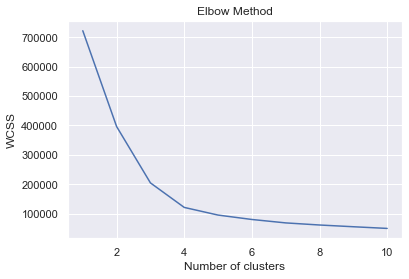

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_3comp)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

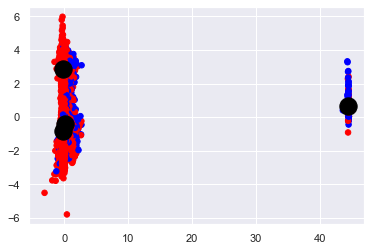

In [45]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_3comp)
plt.scatter(df_3comp[:,0], df_3comp[:,1],c=label, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.show()

## Supervised Learning

### Train-Test split

In [46]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
label = ['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=101)

### Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gbc = GradientBoostingClassifier(random_state=101)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 4]
}

grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params_gbc = grid_search.best_params_
best_estimator_gbc = grid_search.best_estimator_

print("Best parameters:", best_params_gbc)

y_pred = best_estimator_gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(best_estimator_gbc, df[features], df[label], cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9375141498754811
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20625
           1       0.58      0.21      0.30      1460

    accuracy                           0.94     22085
   macro avg       0.76      0.60      0.64     22085
weighted avg       0.92      0.94      0.92     22085

Cross-Validation Accuracy Scores: [0.93611048 0.93556713 0.93461626 0.9362916  0.93615287]
Mean Cross-Validation Accuracy: 0.935747667220927


To evaluate our model we mainly look for recall score since we don't want to make wrong predictions which can lead to loss of money. GradientBoosting Model performed poorly on targetted class since the recall is 21%. We were unable to predict who is going to have financial distress within 2 years.

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=101)

param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2], 
    'max_features': ['sqrt', 'log2']  
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=4
)

grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_
best_estimator_rf = grid_search.best_estimator_

print("Best parameters for Random Forest:", best_params_rf)

y_pred = best_estimator_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Random Forest:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(best_estimator_rf, df[features], df[label], cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest: 0.9379669458908761
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     20625
           1       0.61      0.18      0.27      1460

    accuracy                           0.94     22085
   macro avg       0.78      0.58      0.62     22085
weighted avg       0.92      0.94      0.92     22085

Cross-Validation Accuracy Scores: [0.93692552 0.93525017 0.93565769 0.93678968 0.93642456]
Mean Cross-Validation Accuracy: 0.9362095216170321


Random Forest did even worse job to identify targeted class.

### Oversampling

We apply oversampling onto 1 classes since they are only %6 of entire dataset to see how recall changes.

In [49]:
print(df[df["SeriousDlqin2yrs"]==1].shape[0]/df.shape[0])

0.06746721727160762


ADASYN 


How it Works: ADASYN adapts the oversampling based on the density of the minority class samples. It creates more synthetic samples in areas where minority class density is low (higher imbalance) and fewer synthetic samples where density is high.


Strengths: ADASYN's adaptive approach can be beneficial in scenarios where minority class samples are unevenly distributed. It can be more effective than SMOTE in complex data distributions with clusters and varying density.

Since we were unable to find a distinctive pattern between target classes using PCA, we chose ADASYN over SMOTE

In [50]:
from imblearn.over_sampling import ADASYN  
adasyn = ADASYN(random_state=101)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

### RF with oversampling

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20], 
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt', 'log2']  
}

rf = RandomForestClassifier(random_state=101)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  
    n_jobs=-1, 
    verbose=1  
)

grid_search.fit(X_train_balanced, y_train_balanced)

best_params_rf_samp = grid_search.best_params_
best_estimator_rf_samp = grid_search.best_estimator_

print("Best parameters for Random Forest:", best_params_rf_samp)

y_pred = best_estimator_rf_samp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Random Forest:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_prob = best_estimator_rf_samp.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest: 0.7922571881367444
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     20625
           1       0.19      0.64      0.29      1460

    accuracy                           0.79     22085
   macro avg       0.58      0.72      0.58     22085
weighted avg       0.92      0.79      0.84     22085

ROC AUC Score: 0.7981920630967206


We can see that even if precision score is not enough, recall quite improved. Comparing recall and precision, we matter recall over precision since loss of money is more important than earning more in our case. And since experiencing financial distress ratio is far less than not experiencing it we assume identifying some individuals having financial distress when they will not is less important than vice versa.

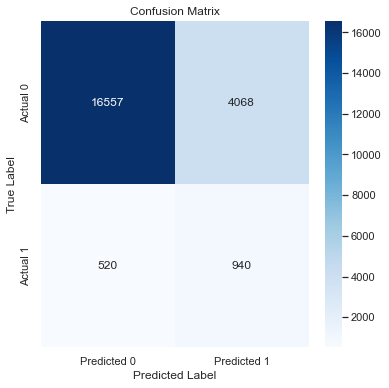

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Neural Networks

First, we start with an input layer which is a dense (fully connected) layer with 100 neurons and a 'ReLU' activation function. This activation function introduces non-linearity, allowing the network to learn complex patterns. Following that a dropout layer with a dropout rate of 0.5 is added. Dropout is a regularization technique that randomly deactivates a fraction of neurons during training, helping prevent overfitting. The second dense hidden layer has 50 neurons with 'ReLU' activation. This layer continues the neural network's learning and abstraction. Finally,
the output layer is a single-neuron dense layer with a 'sigmoid' activation function. The sigmoid function outputs a value between 0 and 1, making it suitable for binary classification, where the value represents the probability of a positive class.

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train_balanced, test_size=0.2, random_state=42
)

model1 = Sequential([
    layers.Dense(100, activation='relu', input_shape=(X_train_split.shape[1],)),
    layers.Dropout(0.5), 
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(1, activation='sigmoid')  
])

optimizer = Adam(learning_rate=0.001) 
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

history1 = model1.fit(
    X_train_split, y_train_split,
    epochs=30, 
    batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


X_test_scaled = scaler.transform(X_test)

y_pred_prob = model1.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Validation ROC-AUC:", roc_auc)


Epoch 1/30
4133/4133 [==============================] - 8s 2ms/step - loss: 0.5524 - accuracy: 0.7335 - val_loss: 0.5192 - val_accuracy: 0.7480 - lr: 0.0010
Epoch 2/30
4133/4133 [==============================] - 7s 2ms/step - loss: 0.5304 - accuracy: 0.7449 - val_loss: 0.5137 - val_accuracy: 0.7499 - lr: 0.0010
Epoch 3/30
4133/4133 [==============================] - 7s 2ms/step - loss: 0.5246 - accuracy: 0.7467 - val_loss: 0.5095 - val_accuracy: 0.7520 - lr: 0.0010
Epoch 4/30
4133/4133 [==============================] - 7s 2ms/step - loss: 0.5215 - accuracy: 0.7486 - val_loss: 0.5074 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 5/30
4133/4133 [==============================] - 7s 2ms/step - loss: 0.5203 - accuracy: 0.7490 - val_loss: 0.5053 - val_accuracy: 0.7561 - lr: 0.0010
Epoch 6/30
4133/4133 [==============================] - 7s 2ms/step - loss: 0.5184 - accuracy: 0.7509 - val_loss: 0.5055 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 7/30
4133/4133 [==============================] - 7s

We try to improve the NN architecture by adding more layers and work with activation functions.

In [54]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train_balanced, test_size=0.2, random_state=42
)

model2 = Sequential([
    layers.Dense(200, activation='tanh', input_shape=(X_train_split.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(50, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.001)  
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

history2 = model2.fit(
    X_train_split, y_train_split,
    epochs=50,  
    batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

X_test_scaled = scaler.transform(X_test)

y_pred_prob = model2.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Validation ROC-AUC:", roc_auc)

Epoch 1/50
4133/4133 [==============================] - 15s 3ms/step - loss: 0.5714 - accuracy: 0.7239 - val_loss: 0.5325 - val_accuracy: 0.7451 - lr: 0.0010
Epoch 2/50
4133/4133 [==============================] - 13s 3ms/step - loss: 0.5469 - accuracy: 0.7345 - val_loss: 0.5293 - val_accuracy: 0.7470 - lr: 0.0010
Epoch 3/50
4133/4133 [==============================] - 12s 3ms/step - loss: 0.5427 - accuracy: 0.7365 - val_loss: 0.5255 - val_accuracy: 0.7463 - lr: 0.0010
Epoch 4/50
4133/4133 [==============================] - 12s 3ms/step - loss: 0.5416 - accuracy: 0.7368 - val_loss: 0.5242 - val_accuracy: 0.7464 - lr: 0.0010
Epoch 5/50
4133/4133 [==============================] - 13s 3ms/step - loss: 0.5415 - accuracy: 0.7371 - val_loss: 0.5220 - val_accuracy: 0.7478 - lr: 0.0010
Epoch 6/50
4133/4133 [==============================] - 13s 3ms/step - loss: 0.5415 - accuracy: 0.7387 - val_loss: 0.5229 - val_accuracy: 0.7491 - lr: 0.0010
Epoch 7/50
4133/4133 [==============================

In [55]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train_balanced, test_size=0.2, random_state=42
)

model3 = Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_split.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005) 
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=4, factor=0.2, min_lr=0.00001)

history3 = model3.fit(
    X_train_split, y_train_split,
    epochs=100,  
    batch_size=64,  
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

X_test_scaled = scaler.transform(X_test) 

y_pred_prob = model3.predict(X_test_scaled)  
roc_auc = roc_auc_score(y_test, y_pred_prob)  
print("Test ROC-AUC:", roc_auc)


Epoch 1/100
2067/2067 [==============================] - 9s 4ms/step - loss: 0.5867 - accuracy: 0.7163 - val_loss: 0.5186 - val_accuracy: 0.7474 - lr: 5.0000e-04
Epoch 2/100
2067/2067 [==============================] - 8s 4ms/step - loss: 0.5282 - accuracy: 0.7438 - val_loss: 0.5092 - val_accuracy: 0.7533 - lr: 5.0000e-04
Epoch 3/100
2067/2067 [==============================] - 7s 4ms/step - loss: 0.5186 - accuracy: 0.7494 - val_loss: 0.5025 - val_accuracy: 0.7603 - lr: 5.0000e-04
Epoch 4/100
2067/2067 [==============================] - 8s 4ms/step - loss: 0.5132 - accuracy: 0.7517 - val_loss: 0.5003 - val_accuracy: 0.7599 - lr: 5.0000e-04
Epoch 5/100
2067/2067 [==============================] - 8s 4ms/step - loss: 0.5109 - accuracy: 0.7536 - val_loss: 0.4956 - val_accuracy: 0.7635 - lr: 5.0000e-04
Epoch 6/100
2067/2067 [==============================] - 7s 4ms/step - loss: 0.5076 - accuracy: 0.7551 - val_loss: 0.4958 - val_accuracy: 0.7637 - lr: 5.0000e-04
Epoch 7/100
2067/2067 [=====

In [56]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

model4 = Sequential([
    layers.Dense(200, activation='tanh', input_shape=(X_train_split.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(50, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.001)  
model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

history4 = model4.fit(
    X_train_split, y_train_split,
    epochs=50,  
    batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

X_test_scaled = scaler.transform(X_test)

y_pred_prob = model4.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Test ROC-AUC:", roc_auc)

Epoch 1/50
2209/2209 [==============================] - 8s 3ms/step - loss: 0.2653 - accuracy: 0.9061 - val_loss: 0.1830 - val_accuracy: 0.9357 - lr: 0.0010
Epoch 2/50
2209/2209 [==============================] - 6s 3ms/step - loss: 0.2042 - accuracy: 0.9319 - val_loss: 0.1840 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 3/50
2209/2209 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9323 - val_loss: 0.1848 - val_accuracy: 0.9340 - lr: 0.0010
Epoch 4/50
2209/2209 [==============================] - 6s 3ms/step - loss: 0.2012 - accuracy: 0.9325 - val_loss: 0.1855 - val_accuracy: 0.9329 - lr: 0.0010
Epoch 5/50
2209/2209 [==============================] - 6s 3ms/step - loss: 0.1990 - accuracy: 0.9320 - val_loss: 0.1859 - val_accuracy: 0.9311 - lr: 2.0000e-04
Epoch 6/50
691/691 [==============================] - 1s 1ms/step
Test ROC-AUC: 0.8437344790369449


In [57]:
from sklearn.metrics import classification_report
y_pred_class = (y_pred_prob > 0.5).astype(int)
report = classification_report(y_test, y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20625
           1       0.53      0.20      0.29      1460

    accuracy                           0.94     22085
   macro avg       0.74      0.59      0.63     22085
weighted avg       0.92      0.94      0.92     22085



### Further work ons with features, scaling and outlier removal

In [58]:
df_3 = pd.read_csv("train.csv", engine = 'python', index_col=0)
np.mean(df[df.isnull().any(axis=1)]["DebtRatio"]) , np.mean(df[df.isnull().any(axis=1)==False]["DebtRatio"])

df_3[(df_3.isnull().any(axis=1))&(df_3["SeriousDlqin2yrs"]==1)].shape,df_3[(df_3.isnull().any(axis=1))&(df_3["SeriousDlqin2yrs"]==0)].shape

((1229, 11), (20958, 11))

In [59]:
df_3[df_3["SeriousDlqin2yrs"]==1].shape,df_3[df_3["SeriousDlqin2yrs"]==0].shape

((7520, 11), (104980, 11))

Now we will only apply scaling without log transformation to compare results.

In [60]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
label = ['SeriousDlqin2yrs']

df_2 = pd.read_csv("train.csv", engine = 'python', index_col=0)

df_2 = df_2[df_2["age"]>=18]
df_2 = df_2[(df_2["MonthlyIncome"]>100) | ((df_2["MonthlyIncome"].isna()))]

# df_2 = df

# for feature in skewed_features:
#     df_2[feature] = np.expm1(df_2[feature])  # Reverse transformation for log1p

# df_2['MonthlyIncome'] = np.exp(df_2['MonthlyIncome'])

df_2 = df_2[df_2.isnull().any(axis=1) != True]

df_2_0 = df_2[df_2["SeriousDlqin2yrs"]==0]
df_2_1 = df_2[df_2["SeriousDlqin2yrs"]==1]

Q1 = df_2_0.quantile(0.25)
Q3 = df_2_0.quantile(0.75)
IQR = Q3 - Q1

df_2_0 = df_2_0[~((df_2_0 < (Q1 - 1.5 * IQR)) |(df_2_0 > (Q3 + 1.5 * IQR))).any(axis=1)]

df_2_all = pd.concat([df_2_0, df_2_1], axis=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_2_all[features], df_2_all[label], test_size=0.2, random_state=101)

In [61]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)

X_train_split2, X_val_split2, y_train_split2, y_val_split2 = train_test_split(
    X_train_scaled2, y_train2, test_size=0.2, random_state=42
)

model4_2 = Sequential([
    layers.Dense(200, activation='tanh', input_shape=(X_train_split2.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.001) 
model4_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

history4_2 = model4_2.fit(
    X_train_split2, y_train_split2,
    epochs=5,
    batch_size=32,
    validation_data=(X_val_split2, y_val_split2),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

X_test_scaled2 = scaler2.transform(X_test2)

y_pred_prob2 = model4_2.predict(X_test_scaled2)
roc_auc2 = roc_auc_score(y_test2, y_pred_prob2)
print("Test ROC-AUC:", roc_auc2)

Epoch 1/5
1213/1213 [==============================] - 3s 2ms/step - loss: 0.2086 - accuracy: 0.9384 - val_loss: 0.1295 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 2/5
1213/1213 [==============================] - 3s 2ms/step - loss: 0.1582 - accuracy: 0.9614 - val_loss: 0.1178 - val_accuracy: 0.9694 - lr: 0.0010
Epoch 3/5
1213/1213 [==============================] - 3s 2ms/step - loss: 0.1496 - accuracy: 0.9629 - val_loss: 0.1180 - val_accuracy: 0.9693 - lr: 0.0010
Epoch 4/5
1213/1213 [==============================] - 3s 2ms/step - loss: 0.1476 - accuracy: 0.9630 - val_loss: 0.1200 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 5/5
379/379 [==============================] - 0s 1ms/step
Test ROC-AUC: 0.9281779865925095


In [62]:
from sklearn.metrics import classification_report
y_pred_class2 = (y_pred_prob2 > 0.5).astype(int)
report2 = classification_report(y_test2, y_pred_class2)
print(report2)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     10863
         1.0       1.00      0.67      0.80      1264

    accuracy                           0.97     12127
   macro avg       0.98      0.83      0.89     12127
weighted avg       0.97      0.97      0.96     12127



We will try also oversampling to see how recall and ROC-AUC changes.

In [63]:
from imblearn.over_sampling import ADASYN  
adasyn2 = ADASYN(random_state=101)
X_train_balanced2, y_train_balanced2 = adasyn.fit_resample(X_train2, y_train2)

In [64]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_balanced2)

X_train_split2, X_val_split2, y_train_split2, y_val_split2 = train_test_split(
    X_train_scaled2, y_train_balanced2, test_size=0.2, random_state=42
)

model4_3 = Sequential([
    layers.Dense(200, activation='tanh', input_shape=(X_train_split2.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.001)  
model4_3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

history4_3 = model4_3.fit(
    X_train_split2, y_train_split2,
    epochs=15, 
    batch_size=32,
    validation_data=(X_val_split2, y_val_split2),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

X_test_scaled2 = scaler2.transform(X_test2)

y_pred_prob2 = model4_3.predict(X_test_scaled2)
roc_auc2 = roc_auc_score(y_test2, y_pred_prob2)
print("Test ROC-AUC:", roc_auc2)

Epoch 1/15
2160/2160 [==============================] - 5s 2ms/step - loss: 0.3124 - accuracy: 0.8685 - val_loss: 0.2301 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 2/15
2160/2160 [==============================] - 5s 2ms/step - loss: 0.2529 - accuracy: 0.8979 - val_loss: 0.2029 - val_accuracy: 0.9224 - lr: 0.0010
Epoch 3/15
2160/2160 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9055 - val_loss: 0.1973 - val_accuracy: 0.9245 - lr: 0.0010
Epoch 4/15
2160/2160 [==============================] - 5s 2ms/step - loss: 0.2281 - accuracy: 0.9108 - val_loss: 0.1937 - val_accuracy: 0.9234 - lr: 0.0010
Epoch 5/15
2160/2160 [==============================] - 5s 2ms/step - loss: 0.2242 - accuracy: 0.9127 - val_loss: 0.1868 - val_accuracy: 0.9268 - lr: 0.0010
Epoch 6/15
2160/2160 [==============================] - 5s 2ms/step - loss: 0.2207 - accuracy: 0.9144 - val_loss: 0.1898 - val_accuracy: 0.9266 - lr: 0.0010
Epoch 7/15
2160/2160 [==============================] - 5s

In [65]:
from sklearn.metrics import classification_report
y_pred_class2 = (y_pred_prob2 > 0.5).astype(int)
report3 = classification_report(y_test2, y_pred_class2)
print(report3)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     10863
         1.0       0.87      0.73      0.79      1264

    accuracy                           0.96     12127
   macro avg       0.92      0.86      0.89     12127
weighted avg       0.96      0.96      0.96     12127



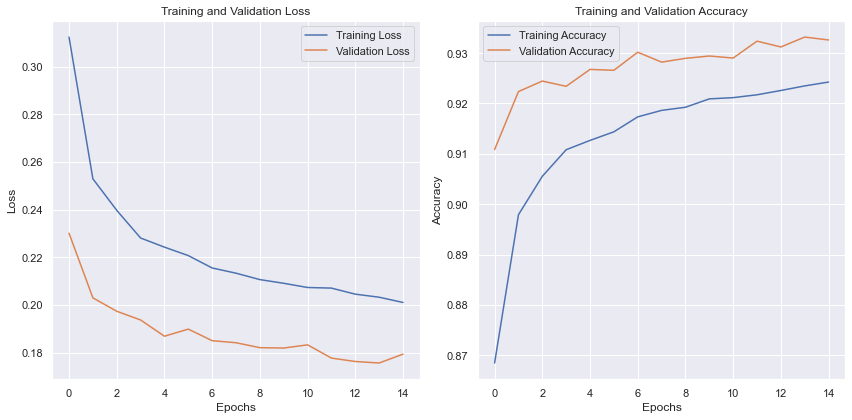

In [66]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history4_3.history['loss'], label='Training Loss')
plt.plot(history4_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4_3.history['accuracy'], label='Training Accuracy')
plt.plot(history4_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

It is not likely to have validation accuracy being higher than training accuracy. We will improve the NN to fit data better.

In [67]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_balanced2)

X_train_split2, X_val_split2, y_train_split2, y_val_split2 = train_test_split(
    X_train_scaled2, y_train_balanced2, test_size=0.2, random_state=42
)

model4_4 = Sequential([
    layers.Dense(200, activation='tanh', input_shape=(X_train_split.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(50, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.001)  
model4_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

history44 = model4_4.fit(
    X_train_split2, y_train_split2,
    epochs=30, 
    batch_size=32,
    validation_data=(X_val_split2, y_val_split2),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

X_test_scaled2 = scaler2.transform(X_test2)

y_pred_prob2 = model4_4.predict(X_test_scaled2)
roc_auc2 = roc_auc_score(y_test2, y_pred_prob2)
print("Test ROC-AUC:", roc_auc2)

Epoch 1/30
2160/2160 [==============================] - 8s 3ms/step - loss: 0.3428 - accuracy: 0.8580 - val_loss: 0.2117 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 2/30
2160/2160 [==============================] - 7s 3ms/step - loss: 0.2686 - accuracy: 0.8938 - val_loss: 0.2045 - val_accuracy: 0.9239 - lr: 0.0010
Epoch 3/30
2160/2160 [==============================] - 6s 3ms/step - loss: 0.2546 - accuracy: 0.9040 - val_loss: 0.2096 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 4/30
2160/2160 [==============================] - 7s 3ms/step - loss: 0.2470 - accuracy: 0.9070 - val_loss: 0.2052 - val_accuracy: 0.9222 - lr: 0.0010
Epoch 5/30
2160/2160 [==============================] - 6s 3ms/step - loss: 0.2394 - accuracy: 0.9122 - val_loss: 0.2045 - val_accuracy: 0.9244 - lr: 0.0010
Epoch 6/30
2160/2160 [==============================] - 6s 3ms/step - loss: 0.2323 - accuracy: 0.9162 - val_loss: 0.1959 - val_accuracy: 0.9273 - lr: 2.0000e-04
Epoch 7/30
2160/2160 [==============================] 

We still have slightly more validation accuracy, this most likely due to drop out layers which decreases accuracy at some level during training which is also not applied to validation accuracy. Also batch regularization during training is not applied to validation set as well. They might be the reason that we have slightly more validation accuracy.

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     10863
         1.0       0.99      0.71      0.83      1264

    accuracy                           0.97     12127
   macro avg       0.98      0.86      0.91     12127
weighted avg       0.97      0.97      0.97     12127



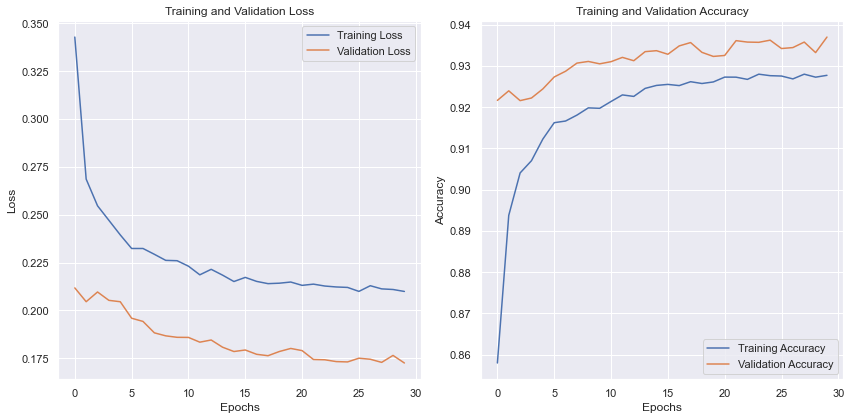

In [68]:
from sklearn.metrics import classification_report
y_pred_class2 = (y_pred_prob2 > 0.5).astype(int)
report4 = classification_report(y_test2, y_pred_class2)
print(report4)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history44.history['loss'], label='Training Loss')
plt.plot(history44.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history44.history['accuracy'], label='Training Accuracy')
plt.plot(history44.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [69]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_balanced2)

X_train_split2, X_val_split2, y_train_split2, y_val_split2 = train_test_split(
    X_train_scaled2, y_train_balanced2, test_size=0.2, random_state=42
)

model4_5 = Sequential([
    layers.Dense(200, activation='tanh', input_shape=(X_train_split2.shape[1],)),
    layers.Dense(100, activation='tanh'),
    layers.Dense(50, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.001) 
model4_5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

history4_5 = model4_5.fit(
    X_train_split2, y_train_split2,
    epochs=30, 
    batch_size=32,
    validation_data=(X_val_split2, y_val_split2),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

X_test_scaled2 = scaler2.transform(X_test2)

y_pred_prob2 = model4_5.predict(X_test_scaled2)
roc_auc2 = roc_auc_score(y_test2, y_pred_prob2)
print("Test ROC-AUC:", roc_auc2)

Epoch 1/30
2160/2160 [==============================] - 5s 2ms/step - loss: 0.2247 - accuracy: 0.9106 - val_loss: 0.2130 - val_accuracy: 0.9152 - lr: 0.0010
Epoch 2/30
2160/2160 [==============================] - 4s 2ms/step - loss: 0.1962 - accuracy: 0.9242 - val_loss: 0.1983 - val_accuracy: 0.9220 - lr: 0.0010
Epoch 3/30
2160/2160 [==============================] - 4s 2ms/step - loss: 0.1876 - accuracy: 0.9285 - val_loss: 0.1811 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 4/30
2160/2160 [==============================] - 4s 2ms/step - loss: 0.1770 - accuracy: 0.9337 - val_loss: 0.1751 - val_accuracy: 0.9359 - lr: 0.0010
Epoch 5/30
2160/2160 [==============================] - 4s 2ms/step - loss: 0.1653 - accuracy: 0.9401 - val_loss: 0.1580 - val_accuracy: 0.9410 - lr: 0.0010
Epoch 6/30
2160/2160 [==============================] - 4s 2ms/step - loss: 0.1567 - accuracy: 0.9436 - val_loss: 0.1810 - val_accuracy: 0.9320 - lr: 0.0010
Epoch 7/30
2160/2160 [==============================] - 4s

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     10863
         1.0       0.97      0.74      0.84      1264

    accuracy                           0.97     12127
   macro avg       0.97      0.87      0.91     12127
weighted avg       0.97      0.97      0.97     12127



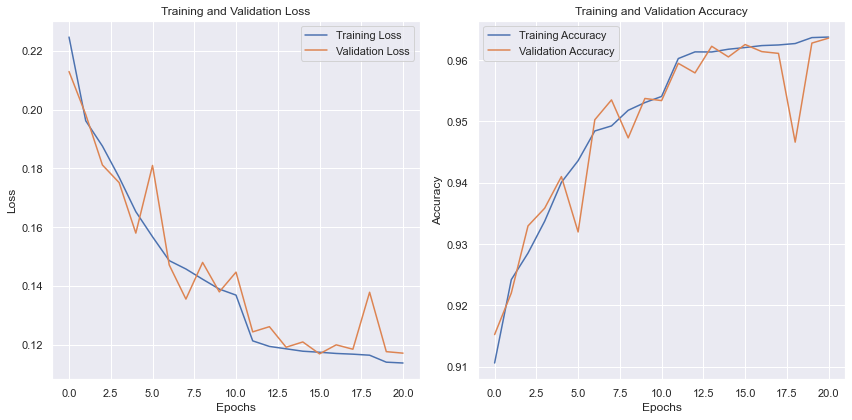

In [70]:
from sklearn.metrics import classification_report
y_pred_class2 = (y_pred_prob2 > 0.5).astype(int)
report5 = classification_report(y_test2, y_pred_class2)
print(report5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history4_5.history['loss'], label='Training Loss')
plt.plot(history4_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4_5.history['accuracy'], label='Training Accuracy')
plt.plot(history4_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

As you can see without batch normalization and drop out layers we started to get higher training accuracies. However, as they improve model's generalization abilities we will keep them in the best model.

### Best NN Model Selection

So out of these we chose the model model4_4 NN architecture as it performed better amongst the others and the most promising one in terms of generalization abilities.

In [71]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def best_nn_model (X_train_balanced2, y_train_balanced2, X_test2, y_test2,epochs=30):
    scaler2 = StandardScaler()
    X_train_scaled2 = scaler2.fit_transform(X_train_balanced2)

    X_train_split2, X_val_split2, y_train_split2, y_val_split2 = train_test_split(
        X_train_scaled2, y_train_balanced2, test_size=0.2, random_state=42
    )

    model4_4 = Sequential([
        layers.Dense(200, activation='tanh', input_shape=(X_train_split2.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='tanh'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(50, activation='tanh'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = RMSprop(learning_rate=0.001)  # You can adjust the learning rate as needed
    model4_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

   
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

    epochs=30

    history4_4 = model4_4.fit(
        X_train_split2, y_train_split2,
        epochs=epochs, 
        batch_size=32,
        validation_data=(X_val_split2, y_val_split2),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    X_test_scaled2 = scaler2.transform(X_test2)

    y_pred_prob2 = model4_4.predict(X_test_scaled2)
    roc_auc2 = roc_auc_score(y_test2, y_pred_prob2)
    print("Test ROC-AUC:", roc_auc2)
    return model4_4,history4_4

#### Without outlier removal

We will also try without outlier removal to see how the best model perform.

In [72]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_2[features], df_2[label], test_size=0.2, random_state=101)

from imblearn.over_sampling import ADASYN  
adasyn3 = ADASYN(random_state=101)
X_train_balanced3, y_train_balanced3 = adasyn3.fit_resample(X_train3, y_train3)

model_wout_outlier, plot_trial_model = best_nn_model(X_train_balanced3,y_train_balanced3,X_test3,y_test3)

Epoch 1/30
3273/3273 [==============================] - 10s 3ms/step - loss: 0.5288 - accuracy: 0.7556 - val_loss: 0.4416 - val_accuracy: 0.8165 - lr: 0.0010
Epoch 2/30
3273/3273 [==============================] - 10s 3ms/step - loss: 0.4681 - accuracy: 0.7975 - val_loss: 0.4162 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 3/30
3273/3273 [==============================] - 9s 3ms/step - loss: 0.4523 - accuracy: 0.8069 - val_loss: 0.3978 - val_accuracy: 0.8340 - lr: 0.0010
Epoch 4/30
3273/3273 [==============================] - 9s 3ms/step - loss: 0.4399 - accuracy: 0.8133 - val_loss: 0.3880 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 5/30
3273/3273 [==============================] - 9s 3ms/step - loss: 0.4322 - accuracy: 0.8201 - val_loss: 0.3850 - val_accuracy: 0.8447 - lr: 0.0010
Epoch 6/30
3273/3273 [==============================] - 9s 3ms/step - loss: 0.4274 - accuracy: 0.8226 - val_loss: 0.3742 - val_accuracy: 0.8499 - lr: 0.0010
Epoch 7/30
3273/3273 [==============================] - 

554/554 [==============================] - 1s 1ms/step
Test ROC-AUC: 0.8312646994324725
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93     16453
         1.0       0.29      0.58      0.38      1263

    accuracy                           0.87     17716
   macro avg       0.63      0.73      0.65     17716
weighted avg       0.92      0.87      0.89     17716



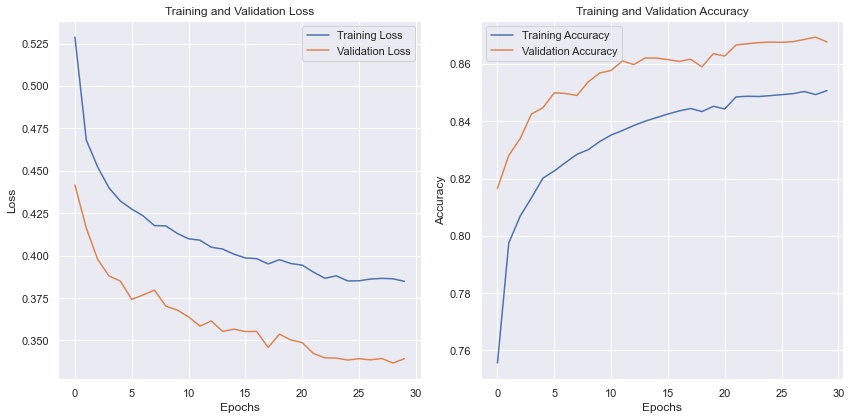

In [73]:
from sklearn.metrics import classification_report

scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train_balanced3)

X_test_scaled3 = scaler3.transform(X_test3)

y_pred_prob3 = model_wout_outlier.predict(X_test_scaled3)
roc_auc3 = roc_auc_score(y_test3, y_pred_prob3)
print("Test ROC-AUC:", roc_auc3)

y_pred_class3 = (y_pred_prob3 > 0.5).astype(int)
report6 = classification_report(y_test3, y_pred_class3)
print(report6)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(plot_trial_model.history['loss'], label='Training Loss')
plt.plot(plot_trial_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(plot_trial_model.history['accuracy'], label='Training Accuracy')
plt.plot(plot_trial_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Including outliers overall did not help the models accuracy and roc-auc score, therefore we will remove them.

## Conclusion 

Out of all the techniques, Neural Networks outperformed the rest of them. After performing several trials to find best architecture we selected a neural network with 3 layers, 200, 100, and 50 neurons, respectively. We achieved 0.97 accuracy, and 0.93 ROC-AUC score on the test set.

In [74]:
X_test_scaled2 = scaler2.transform(X_test2)

y_pred_prob2 = model4_4.predict(X_test_scaled2)
roc_auc2 = roc_auc_score(y_test2, y_pred_prob2)
print("Test ROC-AUC:", roc_auc2)
from sklearn.metrics import classification_report
y_pred_class2 = (y_pred_prob2 > 0.5).astype(int)
report4 = classification_report(y_test2, y_pred_class2)
print(report4)

379/379 [==============================] - 1s 1ms/step
Test ROC-AUC: 0.9284453775270136
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     10863
         1.0       0.99      0.71      0.83      1264

    accuracy                           0.97     12127
   macro avg       0.98      0.86      0.91     12127
weighted avg       0.97      0.97      0.97     12127



## Predicting the Test Set

### Loading the test set

In [75]:
test_data = pd.read_csv("test.csv", engine = 'python', index_col=0)
print(test_data.shape)
test_data

(37500, 10)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.000000,60.0,0.0,0.573896,5279.341306,10.0,0.0,2.0,0.0,1.0
1,0.111143,70.0,0.0,3886.000000,NaN,24.0,0.0,3.0,0.0,0.0
2,0.000000,41.0,1.0,3122.000000,NaN,11.0,0.0,3.0,0.0,0.0
3,0.005666,90.0,0.0,0.000366,5207.587042,1.0,0.0,0.0,0.0,0.0
4,0.043647,60.0,0.0,0.226181,18678.143875,15.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
37495,0.006466,39.0,1.0,0.548070,6351.964584,11.0,1.0,2.0,0.0,2.0
37496,0.008333,27.0,0.0,0.034056,6156.253999,6.0,0.0,0.0,0.0,0.0
37497,0.448646,42.0,0.0,0.217342,1669.624435,4.0,0.0,0.0,0.0,0.0
37498,0.123588,48.0,0.0,0.338560,8101.470792,5.0,0.0,2.0,0.0,3.0


### Missing Value Imputation

In [76]:
test_data.isna().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7544
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       979
dtype: int64

In [77]:
from sklearn.linear_model import LinearRegression
nan_val = test_data[test_data["MonthlyIncome"].isna()]["MonthlyIncome"].values[1]
missing_dependents_indices = test_data[test_data['NumberOfDependents'].isna()].index

median_dependents = test_data['NumberOfDependents'].median()
test_data['NumberOfDependents'].fillna(median_dependents, inplace=True)

features_for_income = ['age', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents']

non_missing_income = test_data[test_data['MonthlyIncome'].notna()]

model_income = LinearRegression()
model_income.fit(non_missing_income[features_for_income], non_missing_income['MonthlyIncome'])

test_data.loc[test_data['MonthlyIncome'].isna(), 'MonthlyIncome'] = model_income.predict(test_data[test_data['MonthlyIncome'].isna()][features_for_income])

test_data.loc[missing_dependents_indices, 'NumberOfDependents'] = nan_val
features_for_dependents = ['age', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome']

non_missing_dependents = test_data[test_data['NumberOfDependents'].notna()]

model_dependents = LinearRegression()
model_dependents.fit(non_missing_dependents[features_for_dependents], non_missing_dependents['NumberOfDependents'])

test_data.loc[test_data['NumberOfDependents'].isna(), 'NumberOfDependents'] = np.round(model_dependents.predict(test_data[test_data['NumberOfDependents'].isna()][features_for_dependents]))

test_data.head()


C:\Users\anili\AppData\Local\Temp\ipykernel_25816\2429077564.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['NumberOfDependents'].fillna(median_dependents, inplace=True)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.000000,60.0,0.0,0.573896,5279.341306,10.0,0.0,2.0,0.0,1.0
1,0.111143,70.0,0.0,3886.000000,4117.015617,24.0,0.0,3.0,0.0,0.0
2,0.000000,41.0,1.0,3122.000000,3140.275544,11.0,0.0,3.0,0.0,0.0
3,0.005666,90.0,0.0,0.000366,5207.587042,1.0,0.0,0.0,0.0,0.0
4,0.043647,60.0,0.0,0.226181,18678.143875,15.0,0.0,1.0,0.0,1.0


In [78]:
test_data.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Predictions using the best model

In [79]:
test_data_scaled = scaler2.transform(test_data)
test_data_pred = model4_4.predict(test_data_scaled)

1172/1172 [==============================] - 2s 1ms/step


### Saving Predictions

In [80]:
test_data.index.values

array([    0,     1,     2, ..., 37497, 37498, 37499], dtype=int64)

In [81]:
test_data_pred_1d = test_data_pred.ravel() 

predictions_df = pd.DataFrame({
    'Id': np.arange(len(test_data_pred_1d)),
    'Probability': test_data_pred_1d
})

predictions_df.to_csv('submission_trial.csv', index=False)